<a href="https://colab.research.google.com/github/amul8612/python-try/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e

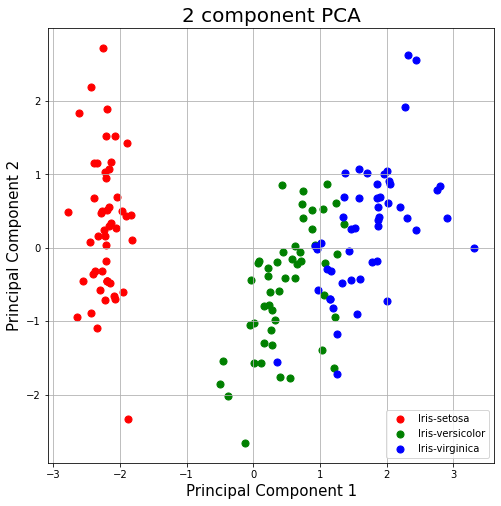

In [ ]:
# PCA
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
dataset = pd.read_csv('Iris.csv')

print(dataset)

print(dataset.columns)

from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Separating out the features
x = dataset.loc[:, features].values
# Separating out the target
y = dataset.loc[:, ['Species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

print(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, dataset[['Species']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


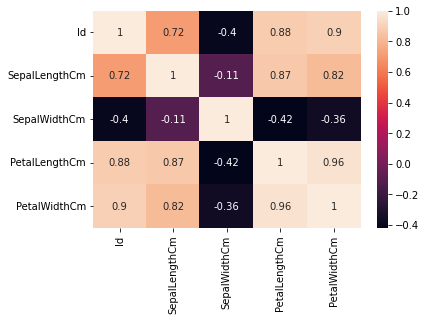

In [ ]:
#correl

import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('Iris.csv')

print(df)

df.head(n=10)
np.unique(df['Species'])
correl=df.corr()
sns.heatmap(correl,annot=True)

      Id  SepalLengthCm  ...  PetalWidthCm          Species
115  116            6.4  ...           2.3   Iris-virginica
89    90            5.5  ...           1.3  Iris-versicolor

[2 rows x 6 columns]


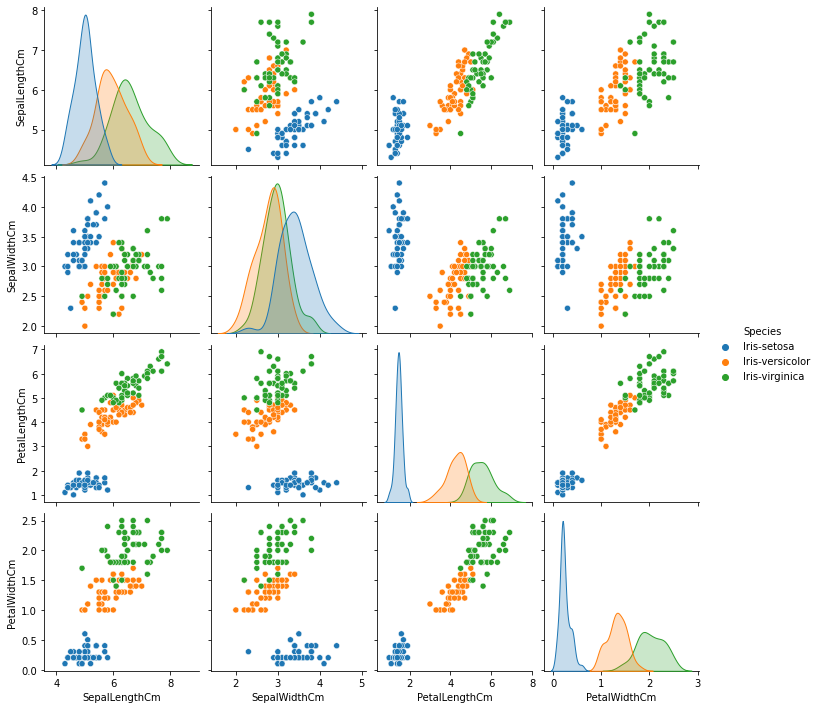

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
     Species
97         1
141        2
120        2
101        2
48         0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
99        0.388889      0.333333       0.525424      0.500000        1
92        0.416667      0.250000       0.508475      0.458333        1
27        0.250000      0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#MLP
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # neural network

from sklearn import metrics

data = pd.read_csv('Iris.csv')

print(data.sample(2))
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )
plt.show()

print(data.describe())

df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)
df_norm.describe()


target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
print(target.sample(n=5))

df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

df = pd.concat([df_norm, target], axis=1)
print(df.sample(n=5))

train, test = train_test_split(df, test_size = 0.3)
trainX = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
trainY=train.Species# output of our training data
testX= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
testY =test.Species   #output value of test data
trainX.head(5)

trainY.head(5)

testX.head(5)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

clf.fit(trainX, trainY)

prediction = clf.predict(testX)
print(prediction)

print(testY.values)


print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


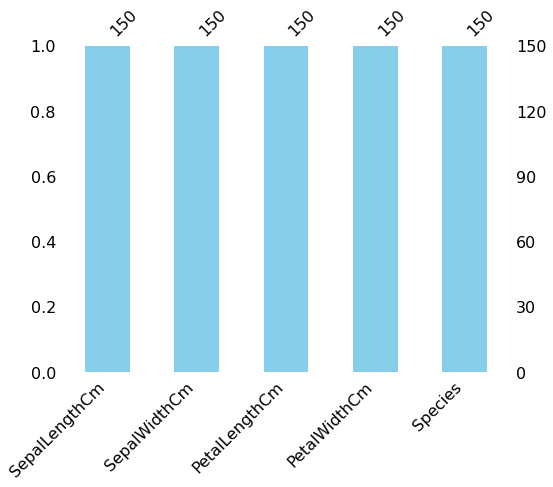

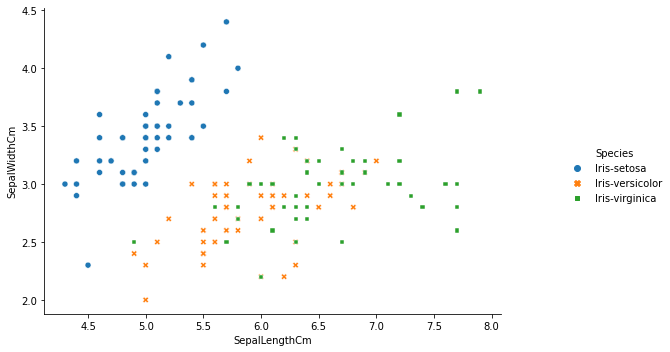

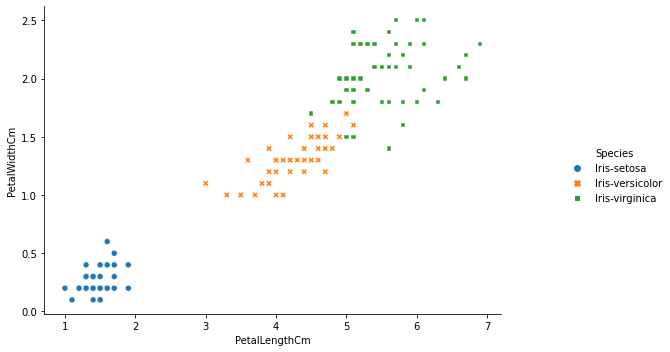

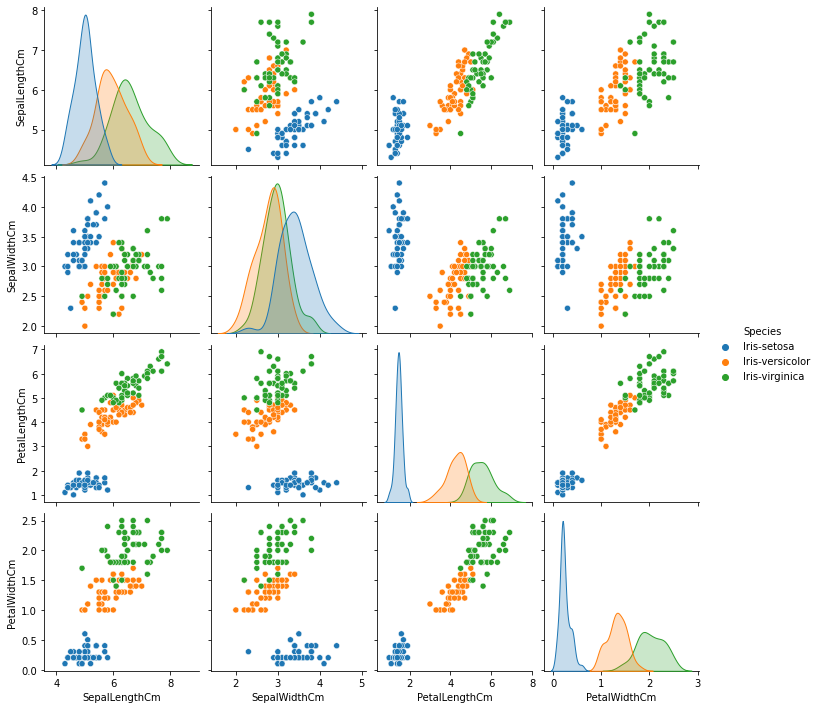

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [ ]:
#naive bayes
import pandas as pd
import numpy as np
from sklearn import datasets
iris = pd.read_csv('Iris.csv') #importing the dataset
#showing the iris data
iris.head()
iris['Species'].unique()
iris.describe(include='all')
iris.info()
iris.drop(columns="Id",inplace=True)
iris.isnull().sum()
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

sns.pairplot(iris,hue="Species")
plt.show()


from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)








In [ ]:
#rbf 
from keras.layers import Layer
from keras import backend as K
 
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)
 
    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)
        def call(self, inputs):
          diff   = K.expand_dims(inputs) - self.mu
          l2 = K.sum(K.pow(diff, 2), axis=1)
          res = K.exp(-1 * self.gamma * l2)
          return res
 
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)
      
import pandas as pd
import numpy as np
 
X = np.load('k49-train-imgs.npz')['arr_0']
y = np.load('k49-train-labels.npz')['arr_0']
y = (y <= 25).astype(int)
 
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy
 
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))
 
model.compile(optimizer='rmsprop', loss=binary_crossentropy)
 
model.fit(X, y, batch_size=256, epochs=3)



Epoch 1/3
908/908 [==============================] - 2s 2ms/step - loss: 10.7784
Epoch 2/3
908/908 [==============================] - 2s 2ms/step - loss: 7.3041
Epoch 3/3
908/908 [==============================] - 2s 2ms/step - loss: 6.7689


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


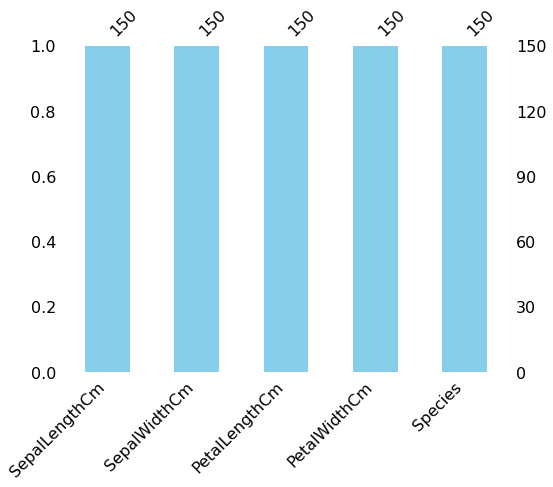

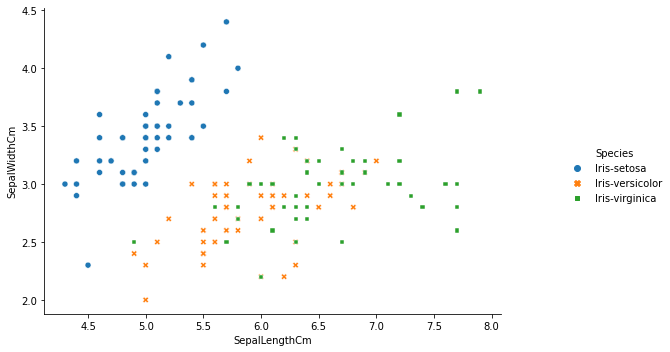

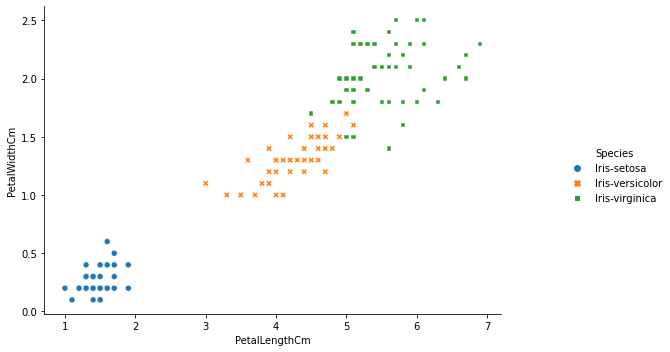

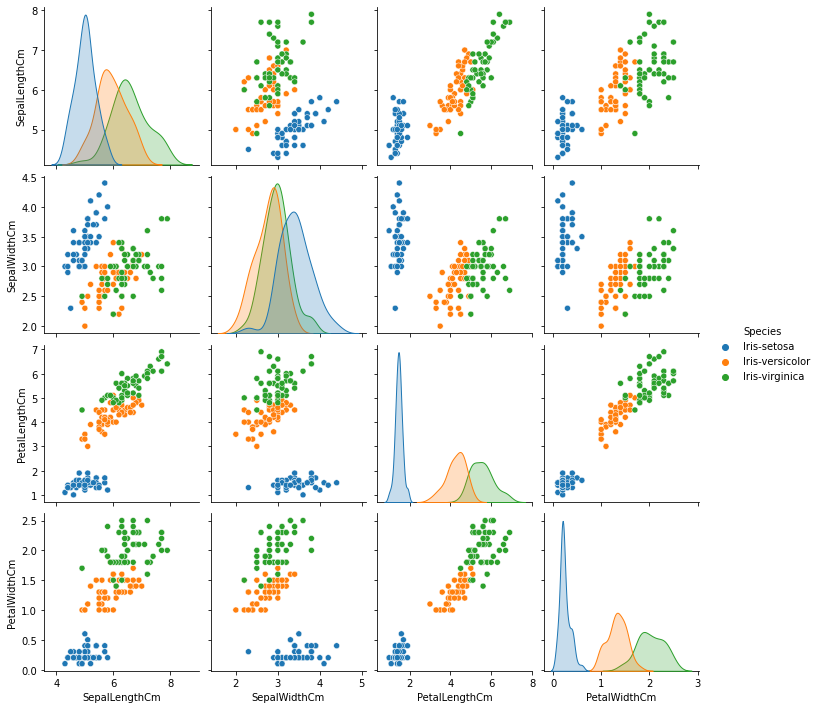

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


In [ ]:
#SVM
import pandas as pd
import numpy as np
from sklearn import datasets
iris = pd.read_csv('Iris.csv') #importing the dataset
#showing the iris data
iris.head()
iris['Species'].unique()
iris.describe(include='all')
iris.info()
iris.drop(columns="Id",inplace=True)
iris.isnull().sum()
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

sns.pairplot(iris,hue="Species")
plt.show()


from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
df.shape
(150, 5)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.

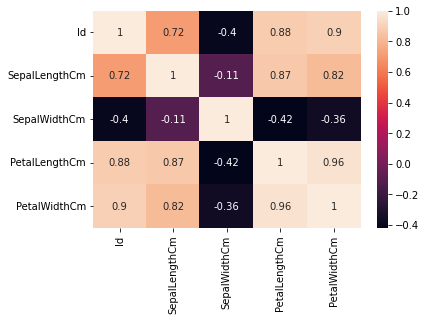

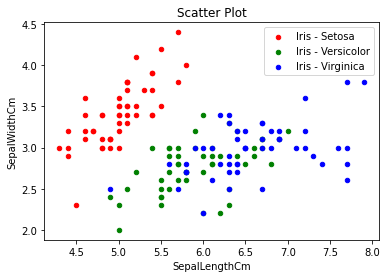

In [ ]:
#KMeans

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('Iris.csv')

print(df)

df.head(n=10)
np.unique(df['Species'])
correl=df.corr()
sns.heatmap(correl,annot=True)

ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")
#checking for Null values
print(df.isnull().sum())

#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df
#finding different class labels 
np.unique(df['Species'])
#DROPPING ID 
df= df.drop(['Id'], axis = 1)
df.shape
print("df.shape")
print(df.shape)
#Train-Test Split
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
print(X)
Y= data [: , -1]
print(Y)
print("printing the shapes ")
print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]
print("train_x")
print(train_x)
print("train_y")
print(train_y)
test_x = X[112:150, ]
test_y = Y[112:150, ]
print("test_x")
print(test_x)
print("test_y")
print(test_y)
print("train and test ")
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)




In [ ]:
from turtle import *
speed(10)
color('cyan')
b=200
while b > 0:
   left(b)
   forward(b * 3)
   b = b-1

TclError: ignored